In [1]:
from pymodulon.core import IcaData
from pymodulon.plotting import *
from pymodulon.io import load_json_model
import pandas as pd

from os import path
import re
from tqdm.notebook import tqdm
from pymodulon.util import _parse_sample
from scipy.stats import pearsonr

In [2]:
import plotly.graph_objects as go
import plotly.express as px

In [3]:
plt.rcParams['svg.fonttype'] = 'none'

In [4]:
ica_data = load_json_model('../../putidaPRECISE321.json')

In [5]:
# Get activity function
def get_activities(
    ica_data,
    sample1,
    threshold,
):

    A_to_use = ica_data.A
        
    sample1_list = _parse_sample(ica_data, sample1)

    a1 = A_to_use[sample1_list].mean(axis=1)
    a1_value = A_to_use[sample1_list]
    a1_var = A_to_use[sample1_list].std(axis=1)
    
    a1_df = pd.DataFrame(data=a1_value)
    a1_df['average'] = a1
    a1_df['std'] = a1_var
    
    a1_df=a1_df.sort_values(by=['average'], ascending=False)
    
    fig = px.bar(a1_df, 
                 x=a1_df.index[abs(a1_df.average)>threshold], 
                 y=a1_df.average[abs(a1_df.average)>threshold],
                 #width=len(a1_df.index[abs(a1_df.average)>threshold])*10,
                 #height=400
                )
    fig
    
    return a1_df, fig


In [6]:
def plotly_scatter(A,B,threshold):
    
    AB=pd.DataFrame()

    AB['A_average']=A['average']
    AB['B_average']=B['average']
    
    for i in AB.index:
        if((abs(A.loc[i,'average'])>threshold) or (abs(B.loc[i,'average'])>threshold)):
            AB.loc[i,'show']=i
        else:
            AB.loc[i,'show']=""
    
    #print(AB)
    
    fig = px.scatter(AB, 
                 x=AB['A_average'], 
                 y=AB['B_average'],
                 text=AB['show']
                 #width=len(a1_df.index[abs(a1_df.average)>threshold])*10,
                 #height=400
                )
    return fig

# Fig 6b

In [7]:
groups={'Muconate:KT2440_gluconate':'Gluconate',
            'ALE:GalactoseA8':'Galactose',
            'ALE:GalactoseA6':'Galactose',
            'ALE:GalactoseA5':'Galactose',
            'ALE:IL_Glc+Ace':'Glucose+acetate',
            'ALE:XyloseA4':'Xylose',
            'ALE:XyloseA3':'Xylose',
            'ALE:XyloseA2':'Xylose',
            'ALE:XyloseA1':'Xylose',
            'Aromatic:Coumarate':'Coumarate',
            'Aromatic:Ferulate':'Ferulate',
            'Carbon:Ferulate':'Ferulate',
            'Aromatic:Coumarate+ferulate':'Coumarate+ferulate',
            'Myristic_acid:Myristic_acid':'Myristic_acid',
            'Muconate:KT2440_fructose':'Fructose',
            'Carbon:Citrate':'Citrate',
            'Carbon:Serine':'Serine'
       }

In [8]:
# iModulons for substrate utilization
im_group=['HexR',
          'GltR-II',
          'PtxS',   
          'FruR',
          'Citrate',
          'Acetate',
          'PcaR',
          'VanR',
          'PsrA',
          'GlnG',
          'PP_5350'
         ]

In [9]:
selected_A=pd.DataFrame()

for i in groups:
    sample_id = ica_data.sample_table[ica_data.sample_table.full_name==i].index.to_list()
    
    temp_A= pd.DataFrame()
    
    for k in sample_id:
        temp_A[k]=ica_data.A[k]
    
    selected_A[i]=temp_A.mean(axis=1)
    

In [10]:
selected_carbon_A=selected_A.loc[im_group]

In [11]:
selected_carbon_A

,Muconate:KT2440_gluconate,ALE:GalactoseA8,ALE:GalactoseA6,ALE:GalactoseA5,ALE:IL_Glc+Ace,ALE:XyloseA4,ALE:XyloseA3,ALE:XyloseA2,ALE:XyloseA1,Aromatic:Coumarate,Aromatic:Ferulate,Carbon:Ferulate,Aromatic:Coumarate+ferulate,Myristic_acid:Myristic_acid,Muconate:KT2440_fructose,Carbon:Citrate,Carbon:Serine
HexR,0.530763,4.127601,4.144605,0.996599,-4.350053,-9.028231,-10.713647,-10.047024,-9.672074,-9.115247,-10.805488,-16.842062,-8.988286,-16.785396,-2.971072,-11.065706,-13.743469
GltR-II,-11.911950,5.378884,6.637204,5.975123,-4.149587,-1.708781,-1.992385,-1.458733,-1.504379,-16.388316,-12.048566,-17.997414,-16.121614,-19.951487,-9.213046,-19.497123,-17.718284
PtxS,1.087128,-15.857589,-16.231131,-16.668471,-5.461035,-1.987783,-1.877450,-1.982878,-2.248392,-11.544631,-10.330342,-19.622012,-10.684962,-23.316180,-13.030050,-19.876892,-19.584645
FruR,-1.566931,-2.811672,-2.750815,-3.152183,-0.769411,-2.822409,-3.135011,-3.814509,-2.166435,-1.513224,-0.352885,-0.237946,-2.656097,-1.224108,9.788612,0.263810,0.034577
Citrate,0.946556,3.466213,3.444054,1.598854,-3.481136,-0.014160,0.379712,0.718832,0.604789,2.452434,0.044475,3.526133,1.354632,1.524699,0.642823,20.200573,-1.491306
Acetate,1.180092,-8.661642,-8.741123,-8.987079,-4.471673,-8.350916,-7.497863,-8.125643,-8.522280,2.319174,4.592099,1.412290,1.496479,-1.632334,4.797266,3.366428,-1.067547
PcaR,-1.008760,-0.008932,0.928712,-0.217698,-2.236457,0.644532,1.280650,0.594390,0.841927,33.111376,37.033570,35.461276,34.262980,-0.676477,-2.888066,-0.654856,-0.686538
VanR,-0.041575,-0.789198,-0.386148,-1.153386,-1.202290,-1.645117,-2.340985,-1.712177,0.277293,-8.959448,12.186451,15.081885,12.162913,-0.725903,-0.603113,-1.263127,-1.069874
PsrA,-0.728255,-5.401030,-4.914268,-4.659737,-1.320695,-2.563625,-3.013943,-3.106477,-2.280403,2.424065,3.209076,1.092504,3.100195,37.330109,-4.303137,1.886762,-1.262821
GlnG,-0.858572,17.176335,16.002623,16.536648,-3.735602,13.798319,18.935636,17.134189,10.686381,4.792446,9.363334,3.044831,-2.034103,-4.475349,9.616091,-2.512936,15.444795


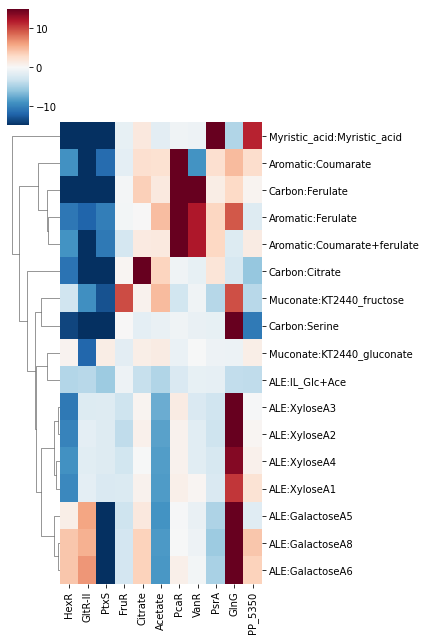

In [12]:
fig = sns.clustermap(selected_carbon_A.T,
               figsize=(6,9),
               center=0, 
               cmap="RdBu_r",
               vmax=15,
               vmin=-15,
              col_cluster=False,
              )

In [13]:
fig.savefig('./raw_files_new/Fig4b_carbon_iM_A.svg')

# Fig 6c

In [14]:
growth=pd.read_csv("../../data/external/sugar_growth_rate.csv", index_col=0)

In [15]:
growth=growth.sort_values(by=["mu_avg"], ascending=False)
growth.head()

,mu_avg,mu_std,mu1,mu2,mu3,Growth_rate_reference,conc_gL
Sample_name,,,,,,,
Muconate:KT2440_gluconate,0.62,0.01,0.620821,0.609152,0.620653,This study,4.00
ALE:GalactoseA8,0.52,0.01,0.510269,0.529292,NaN,10.1021/acssuschemeng.1c03765,4.00
ALE:IL_Glc+Ace,0.42,0.03,0.442754,0.426343,0.389577,10.1039/D0GC01663B,4.00
ALE:GalactoseA6,0.40,0.00,0.401725,0.397249,NaN,10.1021/acssuschemeng.1c03765,4.00
Carbon:Citrate,0.40,0.05,NaN,NaN,NaN,10.1111/1758-2229.12704,1.92


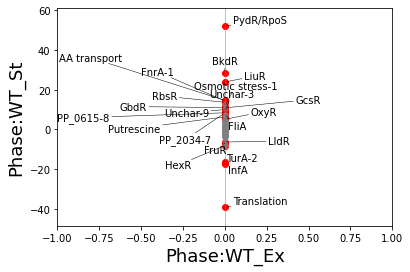

In [16]:
#find iModulons width differential activities during the transition to the stationary phase

fig, df_diff=plot_dima(ica_data,"Phase:WT_Ex","Phase:WT_St", table=True,
                       threshold=5,
                       fdr=0.05,
                       legend_kwargs={'fontsize':14},
                       ax_font_kwargs={'fontsize':18}, 
                       colors={'red'}
                      )

stationary_df=df_diff.index

In [17]:
groups={'Muconate:KT2440_gluconate':'Gluconate',
            'ALE:GalactoseA8':'Galactose',
            'ALE:IL_Glc+Ace':'Glucose+acetate',
            'ALE:GalactoseA6':'Galactose',
            'Carbon:Citrate':'Citrate',
            'Aromatic:Coumarate+ferulate':'Coumarate+ferulate',
            'Carbon:Ferulate':'Ferulate',
            'Aromatic:Ferulate':'Ferulate',    
            'ALE:GalactoseA5':'Galactose',
            'Aromatic:Coumarate':'Coumarate',
            'ALE:XyloseA4':'Xylose',
            'Muconate:KT2440_fructose':'Fructose',            
            'ALE:XyloseA1':'Xylose',
            'ALE:XyloseA2':'Xylose',
            'ALE:XyloseA3':'Xylose',
            'Carbon:Serine':'Serine',
       }

In [18]:
# Calculate pearson correlation between the stationary phase iModulon activity and each substrate condition

PearR=pd.DataFrame()
A_sum=pd.DataFrame()


# Get the reference iModulon activity (stationary phase)
A_ref = ica_data.A[ica_data.sample_table[ica_data.sample_table.full_name=='Phase:WT_St'].index]

# Get PearsonR
for i in groups:
    A_to_use = ica_data.A[ica_data.sample_table[ica_data.sample_table.full_name==i].index]
    PearR[i]=pearsonr(A_to_use.loc[stationary_df].mean(axis=1),A_ref.loc[stationary_df].mean(axis=1))
    A_sum[i]=A_to_use.mean(axis=1)
    
PearR=PearR.T
PearR=PearR.rename(columns={0:'R',1:'pvalue'})
PearR=PearR.sort_values(by='R')

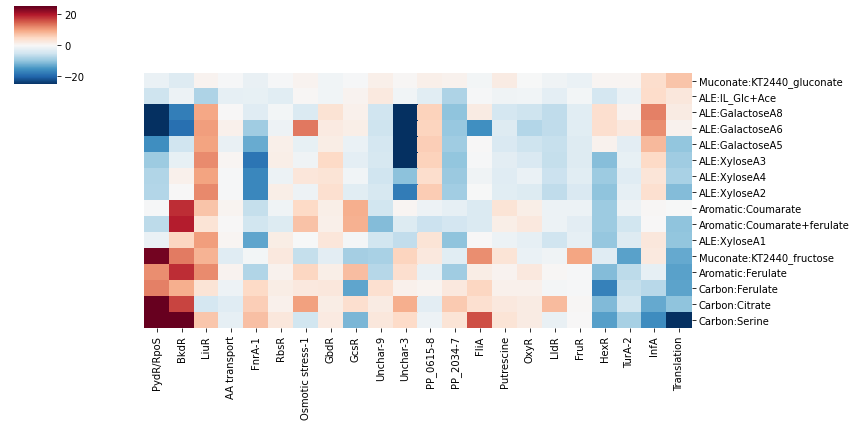

In [19]:
A_sumT=A_sum.T
A_sumT['R']=PearR['R']
A_sumT=A_sumT.sort_values(by=["R"], ascending=True)
A_sumT=A_sumT.drop(columns=['R'])


fig = sns.clustermap(A_sumT[df_diff.index],
               figsize=(12,6),
               center=0, 
               cmap="RdBu_r",
               vmax=25,
               vmin=-25,
              col_cluster=False,
              row_cluster=False
              )

In [20]:
fig.savefig("./raw_files_new/Fig4c_heatmap_stationary_sub.svg")

In [21]:
PearR['mu_avg']=growth.mu_avg
PearR['mu_std']=growth.mu_std

In [22]:
PearR_dropna=PearR.dropna()

In [23]:
PearR_dropna

,R,pvalue,mu_avg,mu_std
Muconate:KT2440_gluconate,-0.674033,5.826208e-04,0.62,0.01
ALE:IL_Glc+Ace,-0.494347,1.935394e-02,0.42,0.03
ALE:GalactoseA8,-0.474013,2.583739e-02,0.52,0.01
ALE:GalactoseA6,-0.453304,3.411148e-02,0.40,0.00
ALE:GalactoseA5,-0.120540,5.931093e-01,0.35,0.02
ALE:XyloseA3,0.035363,8.758506e-01,0.20,0.01
ALE:XyloseA4,0.132487,5.567033e-01,0.26,0.00
ALE:XyloseA2,0.162488,4.700042e-01,0.23,0.01
Aromatic:Coumarate,0.334013,1.287041e-01,0.30,0.00
Aromatic:Coumarate+ferulate,0.342848,1.182863e-01,0.38,0.00


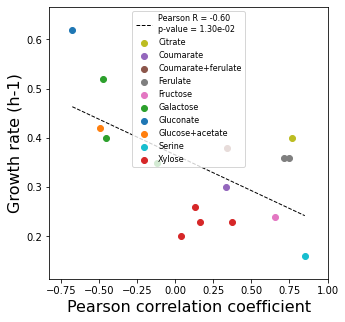

In [24]:
fig = scatterplot(PearR_dropna['R'],
                  PearR_dropna['mu_avg'],
                  show_labels=False,
                  ylabel="Growth rate (h-1)",
                  xlabel="Pearson correlation coefficient",
                  groups=groups,
                  fit_line=True,
                  legend_kwargs={'fontsize':8},
                  ax_font_kwargs={'fontsize':16},                 
                 )

fig.figure.set_size_inches(5,5)

In [25]:
fig.get_figure().savefig("./raw_files_new/Fig4d_Pearson_sub.svg")